# Fitting a normal distribution

- Produce an artificial data set drawn from a normal dist.
- Going to fit a sample model to the data to estimate mean and sd
- Show the effect of overly restrictive priors. 

In [31]:
from pymc3 import Model, HalfNormal, Normal, sample, traceplot
import numpy as np
import matplotlib.pyplot as plt

Generate an artificial dataset

In [32]:
obs_y=np.random.normal(0.5,0.35,2000) 
# draw 2000 samples from a normal dist with mean 0.5 and std 0.35

Model that data with a simple Bayesian model. 

In [33]:
with Model() as norm_fit_model:
    # priors 
    stdev=HalfNormal('stdev', sd=1)
    mu=Normal('mu', mu=0.0, sd=1)
    y=Normal('y', mu=mu,sd=stdev, observed=obs_y)
    # when we design a model we start from the probability dist we're interested in, we assume the output is going to be normal and instanciate it.
    # each pymc3 variable with a string name, a mean, a std and we have to tell it what data its using to estimate the parameters of our model. 
    trace=sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, stdev]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


Above instanciates the model with a name, everything declared in here will be associated with the model.

We create our priors. These are our prior beliefs about what range approximately the true value of mu and std are in and what distribution they follow. We've said:

- mu follows a normal dist centred on 0 with std=1. Very unrestrictive. 
- stdev is half normal since it can't be negative. 

pm.sample() runs the inference algorithm, here it uses Markov Chain Monte Carlo (MCMC). It draws 1000 samples. This is where it differs from frequentists techniques. Instead of getting a single point estimate we estimate by looking at the data what the most likely values of mu and std are that produce the data. This question is answered through a probability distribution that represents the uncertainty the model has about the true values of those parameters. 

We sample from the posterior distributions of stdev and mu and the trace is a dictionary where for each of the random variables in the model we have 1000 draws made from the posterior. 

c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


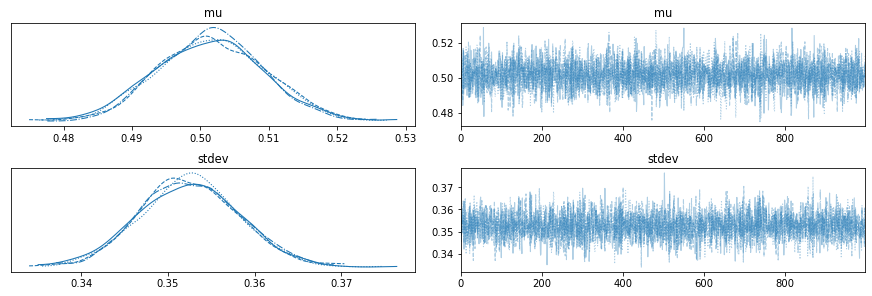

In [34]:
traceplot(trace,['mu', 'stdev'])
plt.show()

The traceplots show the beliefs about the mu and stdv. The expectation of mu around 0.5, which is what we set our initial artificial data set to. There's a little uncertainty, 0.1 roughly. The standard deviation is around 0.34 which is what it should be based on how we generated the data, again with some uncertainty of about 0.1. 

# Overly Restrictive Priors & A lack of data

Set the std of mu to 0.05. The actual value of both stdev and mu is quite far from 0. My belief is that it's much closer to zero than previously thought. This is clearly wrong. So we see a regularising effect. This time I'm also reducing the sampling for obs_y. Instead of 2000 data points we only have 100 now. 

In [35]:
obs_y=np.random.normal(0.5,0.35,100) 
# draw 2000 samples from a normal dist with mean 0.5 and std 0.35

with Model() as norm_fit_model_overrestricted:
    # priors 
    stdev=HalfNormal('stdev', sd=0.05)
    mu=Normal('mu', mu=0.0, sd=0.05)
    y=Normal('y', mu=mu,sd=stdev, observed=obs_y)
    # when we design a model we start from the probability dist we're interested in, we assume the output is going to be normal and instanciate it.
    # each pymc3 variable with a string name, a mean, a std and we have to tell it what data its using to estimate the parameters of our model. 
    trace_restricted=sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, stdev]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


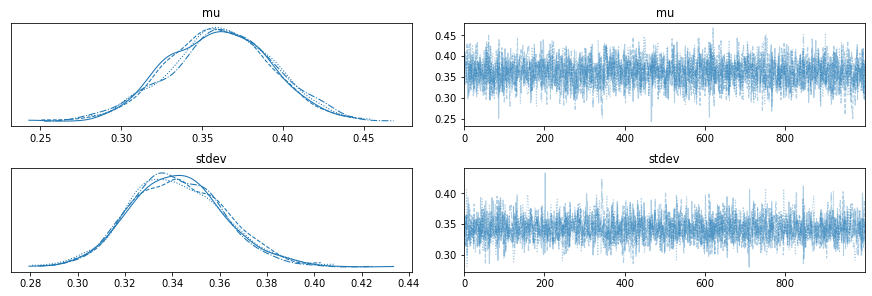

In [36]:
traceplot(trace_restricted,['mu', 'stdev'])
plt.show()

Here mu is estimated at ~0.34. It didn't make it to the true value. The same problem has occured with stdev. We see a regularising effect. There wasn't enough evidence from the data to go as as far as 0.5 from our prior beliefs. It's regularising and keeping it close to zero unless it sees a lot of evidence otherwise. So this is bad here but could be a way to account for data with a lot of outliers!

# Overly restrictive priors with a lot of data. 

This time I keep the restrictive priors but increase the amount of data. Given enough evidence it will find the right value even if it's beyond your prior beliefs if it sees enough times that it's wrong. 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, stdev]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
The acceptance probability does not match the target. It is 0.8786288491579719, but should be close to 0.8. Try to increase the number of tuning steps.
c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


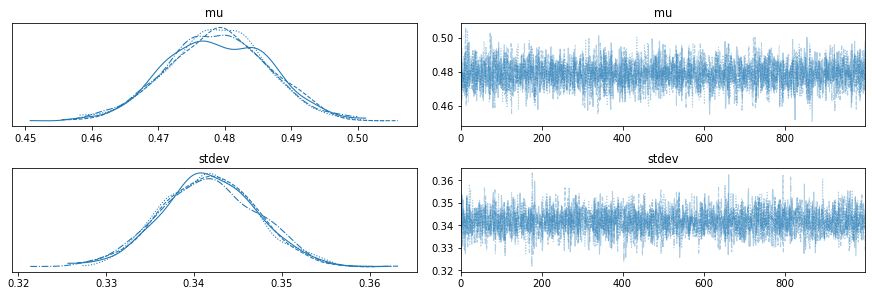

In [37]:
obs_y=np.random.normal(0.5,0.35,2000) 
# draw 2000 samples from a normal dist with mean 0.5 and std 0.35
with Model() as norm_fit_model_overrestricted_two:
    # priors 
    stdev=HalfNormal('stdev', sd=0.05)
    mu=Normal('mu', mu=0.0, sd=0.05)
    y=Normal('y', mu=mu,sd=stdev, observed=obs_y)
    # when we design a model we start from the probability dist we're interested in, we assume the output is going to be normal and instanciate it.
    # each pymc3 variable with a string name, a mean, a std and we have to tell it what data its using to estimate the parameters of our model. 
    trace_restricted_two=sample(1000)
traceplot(trace_restricted_two,['mu', 'stdev'])
plt.show()

# Linear Regression

- Produce an artificial data set representing 2 variables drawn from a normal distribution correlated with each other via a simple linear relationship. 
- Fit a linear regression model to estimate the coefficient of X and the intercept
- Introduce posterior predictive checks (making predictions from the model)

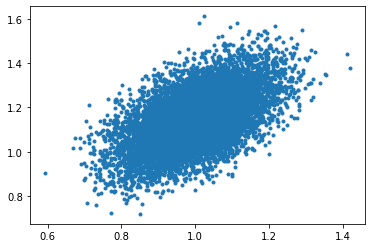

In [38]:
# generate artificial data set
N=10000
noise=np.random.normal(0.0,0.1,N)
X=np.random.normal(1.0,0.1, N)
obs_y=(0.65*X)+0.5+noise
plt.plot(X,obs_y, '.')

The goal will be to reverse engineer the formal to find the beta coefficient (0.65) and intercept (0.5) and characterise the noise parameter (stdev=0.1). 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, intercept, stdev]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 196 seconds.
c:\users\aaron\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


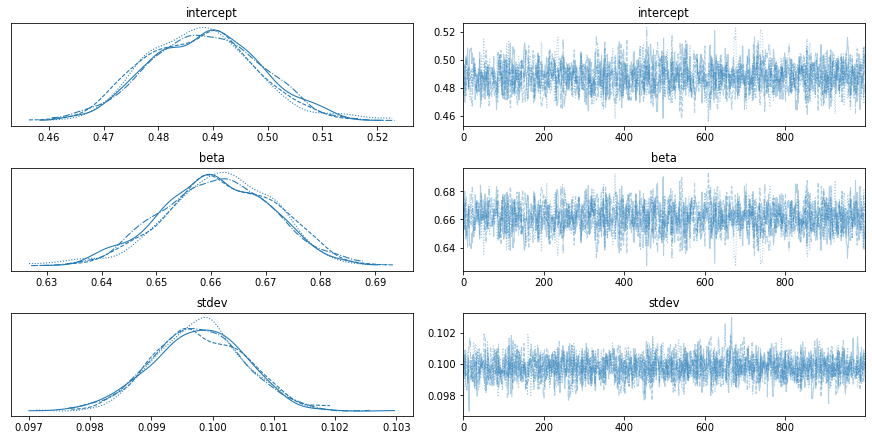

In [39]:
with Model() as linear_regression:
    #priors
    stdev=HalfNormal('stdev', sd=1.0)
    # half normal since it can't be negative
    intercept=Normal('intercept',mu=0.0, sd=1.0)
    # could be negative or positive so normal
    coeff=Normal('beta',mu=0.5,sd=1.0)
    #could be negative or positive so normal
    
    expected_value=(X*coeff)+intercept
    #likelihood
    y=Normal('y',mu=expected_value,sd=stdev,observed=obs_y)
    # we expect that y follows a normal distribution and link it to the observed data obs_y
    # now, we're not just fitting a distribution, we care about the relationship between two variables.
    # the way this is expressed is that the mean of your normal distribution is determined by a coefficient times x + intercept. 
    # we're trying to estimate the coefficient and the intercept and the model has some error which is the noise and we capture that with stdev
    
    trace=sample(1000)
    
traceplot(trace,['intercept', 'beta','stdev'])
plt.show()

We got intercept 0.5, beta =0.66, stdev=0.1 accuractely characterising the input data. 

# Posterior predictive checks

In [40]:
from pymc3 import sample_posterior_predictive

We have a model and it's fitted, so how to make predictions? Make them based on the training data in this example although it's possible to use new data. 

Nowere in the below are x values for predictions specified because the way ppc works is that implicitly it uses the X values that were used in the training before. 

Explicitly other values of x can be specified however.

y_preds shape =  (1000, 10000)


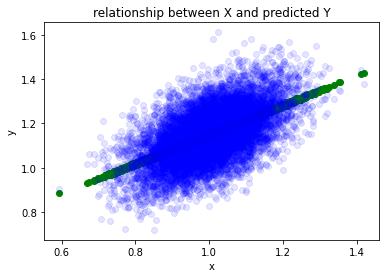

In [43]:
with linear_regression:
    ppc=sample_posterior_predictive(trace, samples=1000)
    y_preds=ppc['y']
    print("y_preds shape = ", ppc['y'].shape)
    expected_y_pred= np.reshape(np.mean(y_preds,axis=0), [-1])
    # This gives the expectation of the above s
    plt.scatter(X, expected_y_pred,c='g')
    plt.scatter(X,obs_y,c='b',alpha=0.1)
    plt.title('relationship between X and predicted Y')
    plt.xlabel('x')
    plt.ylabel('y')

ppc is for posterior predictive check. You pass the trace that you recieved earlier into it and specify the number of samples.

Sample ppc returns a dictionary of shape 1000,10000. It goes through every value of x in the data and for each of those it draws 1000 values of the posterior distributions of the variables estimated. With those it produces predictions. So for each X you get 1000 predictions, slightly different due to the uncertainty in the estimation of the parameters. 

Expected_y will take the expectation values of these. You could also take quantiles if you were interested in seeing uncertainty or take other statistical measures. 